In [1]:
using Posets
using Plots

In [3]:
using CSV
using DataFrames
using Posets
using Plots
import Statistics: mean, median
using LaTeXStrings
using DelimitedFiles

![ejemplo](figs/bannerchen.png)

## datos

In [2]:
intervalos = [(13000,14000), (14000,15000),(15000,16000),(16000,17000), (17000,18000), (18000,19000), (19000,20000)]

7-element Array{Tuple{Int64,Int64},1}:
 (13000, 14000)
 (14000, 15000)
 (15000, 16000)
 (16000, 17000)
 (17000, 18000)
 (18000, 19000)
 (19000, 20000)

In [3]:
actualenrollment = [
    13055,
13563,
13867,
14696,
15460,
15311,
15603,
15861,
16807,
16919,
16388,
15433,
15497,
15145,
15163,
15984,
16859,
18150,
18970,
19328,
19337,
18876
];

## Funciones

In [21]:
function factchecker(punto, interval)
    for i in eachindex(interval)
        x,y = interval[i]
        if x <= punto && punto < y
            return i
        end
    end
    throw(ErrorException("intervalo invalido"))
end

factchecker (generic function with 1 method)

In [22]:
function pasamidpoints(intervalos, listapuntos)
    tuplasvalidas = intervalos[listapuntos]
    n = length(tuplasvalidas)
    sum((y+x)/2 for (x,y) in tuplasvalidas)/n
end

pasamidpoints (generic function with 1 method)

In [23]:
function createmidpoints(lista,intervalos)
    dict = Dict{Integer,Array{Int,1}}()
    output = Dict{Integer, Float64}()
    for i in 1:length(lista)-1
        x = factchecker(lista[i],   intervalos)
        y = factchecker(lista[i+1], intervalos)
        #dict[x] = push!(dict[x], y)
        if haskey(dict, x)
            dict[x] = union!(dict[x], y)
        else
            push!(dict, x => [y])
        end
    end
    @show dict
    for i in 1:length(intervalos)
        if haskey(dict, i)
            push!(output, i => pasamidpoints(intervalos, dict[i]))
        else
            push!(output, i=> pasamidpoints(intervalos, [i]))
        end
    end
    output
end

createmidpoints (generic function with 1 method)

## Analisis

In [8]:
salida = createmidpoints(actualenrollment, intervalos)

dict = Dict{Integer,Array{Int64,1}}(7 => [7, 6],4 => [4, 3, 6],2 => [3],3 => [3, 4],6 => [6, 7],1 => [1, 2])


Dict{Integer,Float64} with 7 entries:
  7 => 19000.0
  4 => 16833.3
  2 => 15500.0
  3 => 16000.0
  5 => 17500.0
  6 => 19000.0
  1 => 14000.0

In [36]:
salida[factchecker(13867, intervalos)]

14000.0

In [36]:
salida[factchecker(13867, intervalos)]

14000.0

Resultado correcto

In [41]:
salida[factchecker(15460, intervalos)]

16000.0

## Graficas

In [15]:
length(actualenrollment)

22

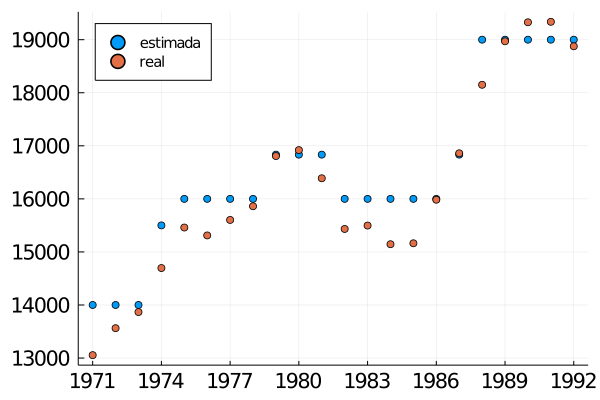

In [21]:
scatter([[salida[factchecker(x, intervalos)] for x in actualenrollment] actualenrollment], legend=:topleft, labels = ["estimada" "real"],xtickfontsize=14,
ytickfontsize=14,legendfontsize=10, xticks=(1:3:22, 1971:3:1992))

# Usando los datos de universidades

In [4]:
list_dataframes = [DataFrame(CSV.File("data/"*f)) for f in readdir("data")];

In [5]:
nombresbuenos = intersect([l.Univ for l in list_dataframes]...);
nombresbuenos = nombresbuenos[1:30];

In [6]:
data_filtrada = [xxx[([x ∈ nombresbuenos for x in xxx.Univ]),:] for xxx in list_dataframes];

In [8]:
nombresbuenos[4]

"UniversityofCalifornia,Berkeley"

In [28]:
actualenrollment = vcat([
    xxx[([x == nombresbuenos[9] for x in xxx.Univ]),2]
    for xxx in list_dataframes
    ]...)

14-element Array{Float64,1}:
 59.5
 61.4
 59.7
 57.6
 56.4
 56.8
 56.3
 56.4
 56.4
 56.1
 55.9
 57.4
 56.6
 58.9

In [29]:
extrema(actualenrollment)

(55.9, 61.4)

In [34]:
intervalos = [(i, i+3) for i in 50:3:62-3]

4-element Array{Tuple{Int64,Int64},1}:
 (50, 53)
 (53, 56)
 (56, 59)
 (59, 62)

In [35]:
salida = createmidpoints(actualenrollment, intervalos)

dict = Dict{Integer,Array{Int64,1}}(4 => [4, 3],2 => [3],3 => [3, 2])


Dict{Integer,Float64} with 4 entries:
  4 => 59.0
  2 => 57.5
  3 => 56.0
  1 => 51.5

In [36]:
[salida[factchecker(x, intervalos)] for x in actualenrollment]

14-element Array{Float64,1}:
 59.0
 59.0
 59.0
 56.0
 56.0
 56.0
 56.0
 56.0
 56.0
 56.0
 57.5
 56.0
 56.0
 56.0

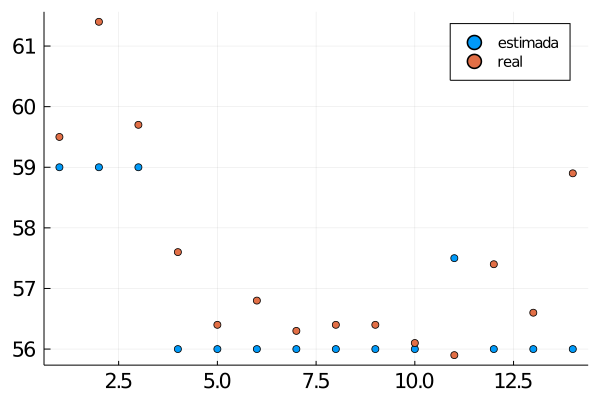

In [38]:
scatter([[salida[factchecker(x, intervalos)] for x in actualenrollment] actualenrollment], legend=:topright, labels = ["estimada" "real"],xtickfontsize=14,
ytickfontsize=14,legendfontsize=10#=, xticks=(1:3:22, 1971:3:1992)=#)